*  Tu testeras au minimum 4 algorithmes de famille différente (par exemple : ElasticNet, SVM, GradientBoosting, RandomForest).
* Votre prédiction se basera sur les données structurelles des bâtiments (taille et usage des bâtiments, date de construction, situation géographique, ...


## Nom des variables 

* OSEBuildingID : L'ID du batiment
* DataYear : Année de consommation
* BuildingType : Type de Building (Résidence ou pas)
* PrimaryPropertyType : Type de propriété (Hotel, Ecole...)
* PropertyName : Nom du bâtiment
* Address : L'adresse du bâtiment
* City : La ville ou est situé le bâtiment
* State : L'état ou est situé le bâtiment
* ZipCode : Code postal (peut etre différent même dans un même état)
* TaxParcelIdentificationNumber : Numero identification (fiscale)
* CouncilDistrictCode : code du district du conseil de la ville de Seattle
* Neighborhood : Quartier
* Latitude : La latitude
* Longitude : La longitude
* YearBuilt : Date de création ou de rénovation
* NumberofBuildings : Nombre de buildings dans la propriété
* NumberofFloors : Nombre d'étages
* PropertyGFATotal : Surface brute de plancher totale du bâtiment et du parking
* PropertyGFAParking : Espace brute de tous les types de stationnement
* PropertyGFABuilding(s) : Surface brute du bâtiment
* ListOfAllPropertyUseTypes : Types d'utilisation de la propriété
* LargestPropertyUseType : Type d'utilisation principale de la propriété
* LargestPropertyUseTypeGFA : Surface brute de plancher (Utilisation principale)
*  SecondLargestPropertyUseType : Type d'utilisation secondaire de la propriété
* SecondLargestPropertyUseTypeGFA: Surface brute de plancher (Utilisation secondaire)
* ThirdLargestPropertyUseType : Type d'utilisation tertiaire de la propriété
* ThirdLargestPropertyUseTypeGFA : Surface brute de plancher (Utilisation tertiaire)
* YearsENERGYSTARCertified : Année auquel la propriété a recu la certification ENERGYSTAR
* ENERGYSTARScore : Score (de 1 a 100) qui calcule la performance énergétique d'un bien immobilier
* SiteEUI(kBtu/sf) : Energie annuelle consommée d'un bien immobilier / Surface brute de plancher
* iteEUIWN(kBtu/sf) : SiteEUI(kBtu/sf) normalisée en fonctions des conditions météologiques
* SourceEUI(kBtu/sf) : Energie annuelle consommée d'un bien immobilier (y compris les pertes) / Surface brute de plancher
* SourceEUIWN(kBtu/sf) : SourceEUI(kBtu/sf) normalisée en fonctions des conditions météologiques
* SiteEnergyUse(kBtu) : Quantité annuelle d'énergie consommée, toutes sources d'énergie confondues
* SiteEnergyUseWN(kBtu) : SiteEnergyUse(kBtu) normalisée en fonctions des conditions météologiques
* SteamUse(kBtu) : Quantité annuelle de vapeur urbaine consommée
* Electricity(kWh) : Quantité annuelle d'électricité consommée
* Electricity(kBtu) : Electricity mais en British thermal units (kBtu)
* NaturalGas(therms) : Quantité annuelle de gaz naturel consommée (therms)
* NaturalGas(kBtu) : NaturalGas mais en British thermal units (kBtu).
* DefaultData : A t'on utilisé des valeurs par défault (fausses valeurs) sur certaines features?
* Comments : Commentaires du propriétaire ajoutant du contexte sur les valeurs des features
* ComplianceStatus : Satisfait t'il aux exigences de l'analyse de la consommation d'énergie?
* Outlier : Ce bâtiment est il dans la moyenne ou exceptionnel?
* TotalGHGEmissions : Quantité totale d'émissions de (dioxyde de carbone + le méthane + l'oxyde nitreux)
* GHGEmissionsIntensity : TotalGHGEmissions / Surface brute de plancher de la propriété
SiteEnergyUseWN(kBtu

# importation de pakage

In [113]:
import pandas as pd
import numpy as np
#%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
#import sante as s
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
#from termcolor import colored
import math
from scipy import stats
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#from sklearn.impute import KNNImputer
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib.ticker import PercentFormatter

#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1)

In [114]:
import plotly.express as px


In [115]:
#import batiment as b

In [116]:
import bat as bt

### chargement des données 

In [117]:
data = pd.read_csv('DataCleaned.csv', sep = ",")
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv', sep = ",") 


### valeurs manquantes doublons, duplications

In [6]:
miss = bt.missing_values(df)

Le total des valeurs manquantes est 19952
Nombre de lignes dupliquées : 0
The size of the database is: (3376, 46)


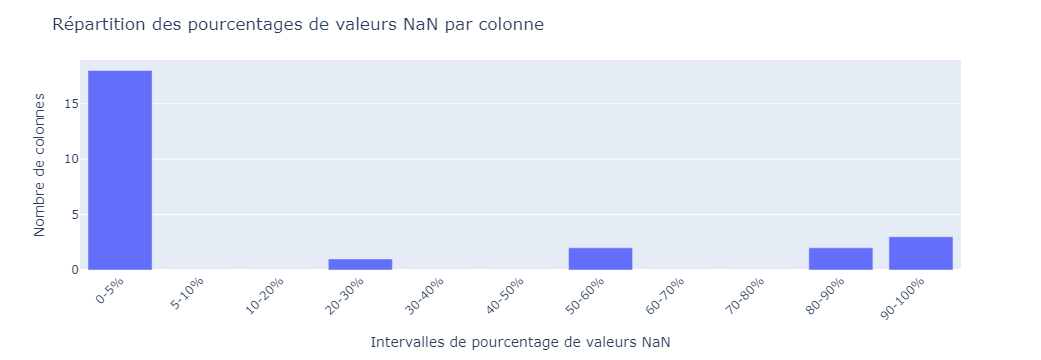

In [7]:
viz = bt.nan_percentages(df)


In [8]:
res =bt.variable_to_drop(df)

In [9]:
df.shape

(3376, 46)

In [10]:
res.shape

(995, 24)

In [11]:
res.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(therms)', 'DefaultData', 'ComplianceStatus',
       'TotalGHGEmissions'],
      dtype='object')

# transformation de le colonne âge

In [76]:
# Calculer l'âge en soustrayant chaque valeur de YearBuilt de 2016
df['Age'] = 2016 - df['YearBuilt']

# Réorganiser les colonnes pour placer "Age" avant "YearBuilt"
df = df[['Age'] + [col for col in df.columns if col != 'Age' and col != 'YearBuilt']]

In [14]:
#res = res.drop(columns=['City', 'State'])


In [15]:
numerical_features = res.select_dtypes(include=['int64','float64'])
categorical_features = res.select_dtypes(exclude=['int64','float64'])

In [16]:
##suppression des colonnes ne possédant qu'une seule valeurs

In [17]:
count_unique = df.nunique()

# Filtrer les colonnes avec une seule valeur unique
columns_with_single_value = count_unique[count_unique == 1].index.tolist()

# Afficher les noms des colonnes avec leur valeur unique
for column in columns_with_single_value:
    unique_value = df[column].unique()[0]
    print(f"Colonne : {column}, Valeur unique : {unique_value}")

Colonne : DataYear, Valeur unique : 2016
Colonne : City, Valeur unique : Seattle
Colonne : State, Valeur unique : WA


In [18]:
print("Nombre de lignes avant la suppression :", df.shape[0])

values_to_exclude = ['Multifamily MR (5-9)', 'Multifamily LR (1-4)', 'Multifamily HR (10+)']
df = df[~df['BuildingType'].isin(values_to_exclude)]

print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 3376
Nombre de lignes après la suppression : 1668


In [19]:
columns_with_only_nan = df.columns[df.isna().all()].tolist()
print("Colonnes avec uniquement des NaN :", columns_with_only_nan)

Colonnes avec uniquement des NaN : ['Comments']


In [20]:
print("Nombre de lignes avant la suppression :", df.shape[0])
df.dropna(subset=['ENERGYSTARScore'], inplace=True)
print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 1668
Nombre de lignes après la suppression : 1094


In [21]:
print("Nombre de lignes avant la suppression :", df.shape[0])
df.dropna(subset=['SiteEnergyUse(kBtu)'], inplace=True)
print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 1094
Nombre de lignes après la suppression : 1094


In [22]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(columns="PropertyName")
df = df.drop(columns=['OSEBuildingID', 'TaxParcelIdentificationNumber'])
df = df.drop(columns=['Address', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood'])
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 46
Nombre de colonnes après la suppression : 39


In [23]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(columns="Outlier")
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 39
Nombre de colonnes après la suppression : 38


In [24]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop("NaturalGas(kBtu)", axis=1)
df = df.drop("Electricity(kWh)", axis=1)
df = df.drop(columns=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)'])
df = df.drop(columns=['SiteEnergyUse(kBtu)'])
df = df.drop(columns=['GHGEmissionsIntensity'])
df = df.drop(columns=['YearsENERGYSTARCertified'])

print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 38
Nombre de colonnes après la suppression : 29


In [25]:
df = df.drop(columns=['DefaultData','Comments'])

In [26]:
print("Nombre de colonnes avant la suppression :", df.shape[1])

df = df.drop(columns=['City', 'State'])
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 27
Nombre de colonnes après la suppression : 25


In [27]:
###

In [28]:
numerical_features.columns

Index(['Age', 'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(therms)', 'TotalGHGEmissions'],
      dtype='object')

In [29]:
categorical_features.columns

Index(['BuildingType', 'PrimaryPropertyType', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'DefaultData', 'ComplianceStatus'],
      dtype='object')

In [30]:
categorical_features['ComplianceStatus'].value_counts()

ComplianceStatus
Compliant    995
Name: count, dtype: int64

In [31]:
### statut de conformité

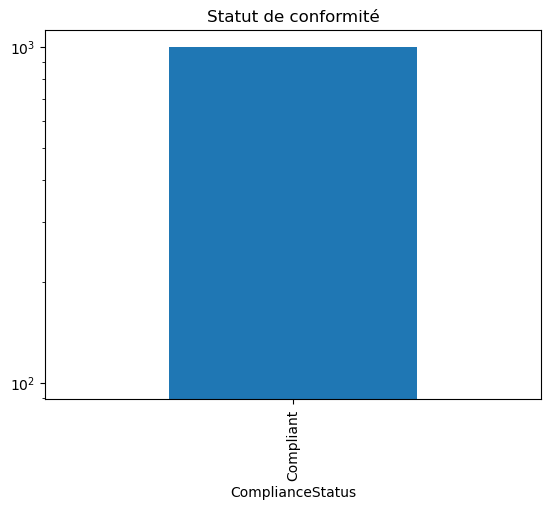

In [32]:
import matplotlib.pyplot as plt

categorical_features['ComplianceStatus'].value_counts().plot(kind='bar')
plt.title('Statut de conformité')
plt.yscale('log')
plt.savefig('statutde conformité.png')
plt.show()


Statut de conformité
Conforme 997
Erreur - Corriger les données par défaut 88 
Non conforme 9  

<function matplotlib.pyplot.show(close=None, block=None)>

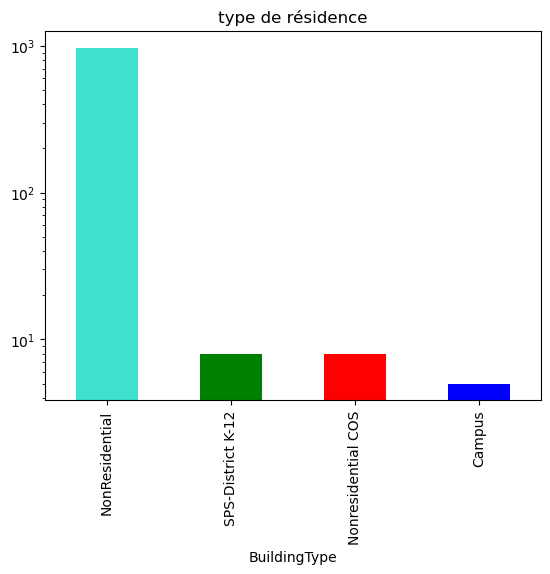

In [33]:
categorical_features['BuildingType'].value_counts().plot(kind= 'bar', color =['turquoise', 'green', 'red', 'blue'])
#plt.figure(figsize=(10, 10))
plt.title('type de résidence')
plt.yscale('log')
plt.savefig('type.png')
plt.show

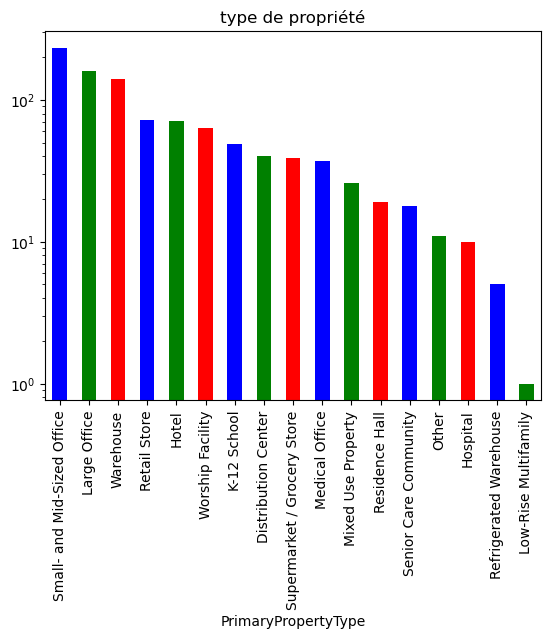

In [34]:
categorical_features['PrimaryPropertyType'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('type de propriété')
plt.yscale('log')
plt.show()


In [35]:
df= df.drop(columns ='ListOfAllPropertyUseTypes')



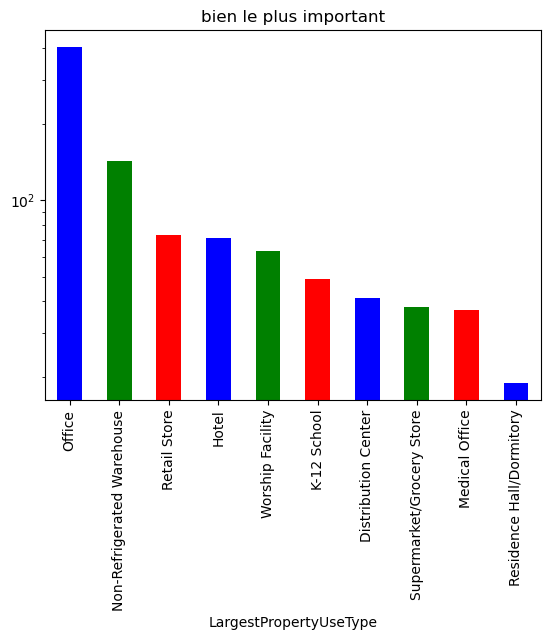

In [36]:
top10=categorical_features['LargestPropertyUseType'].value_counts().head(10)
top10.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('bien le plus important')
plt.yscale('log')
plt.show()



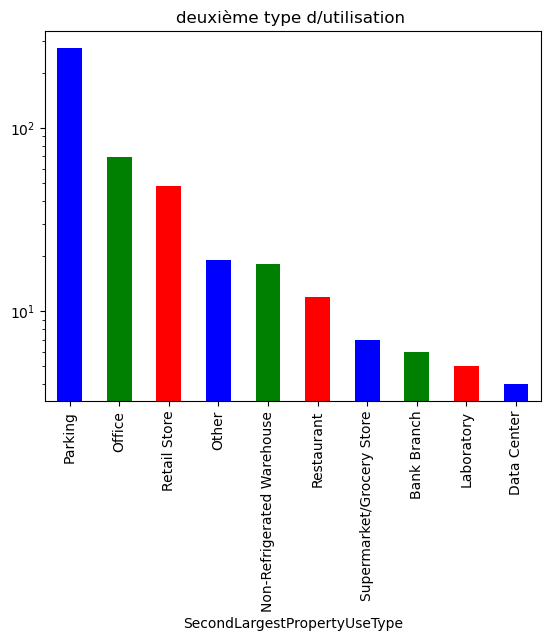

In [38]:
top10=categorical_features['SecondLargestPropertyUseType'].value_counts().head(10)
top10.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('deuxième type d/utilisation ')
plt.yscale('log')
plt.show()

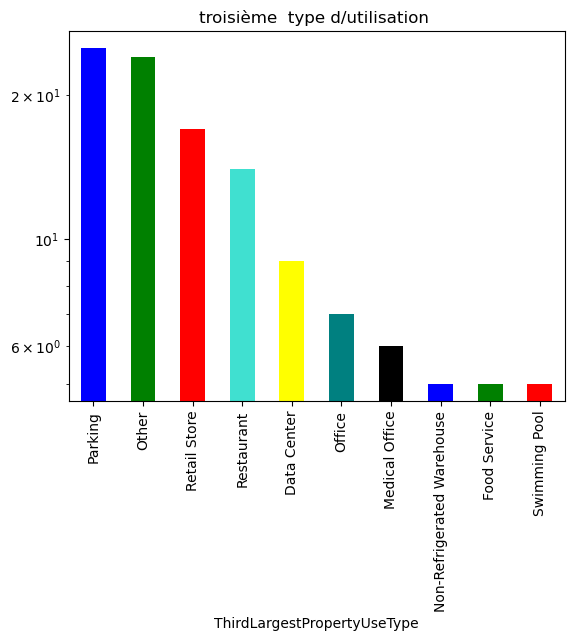

In [39]:
top10=categorical_features['ThirdLargestPropertyUseType'].value_counts().head(10)
top10.plot(kind='bar', color=['blue', 'green', 'red', 'turquoise', 'yellow', 'teal','black'])
plt.title('troisième  type d/utilisation ')
plt.yscale('log')
plt.show()

In [40]:
numerical_features.columns

Index(['Age', 'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(therms)', 'TotalGHGEmissions'],
      dtype='object')

<Axes: >

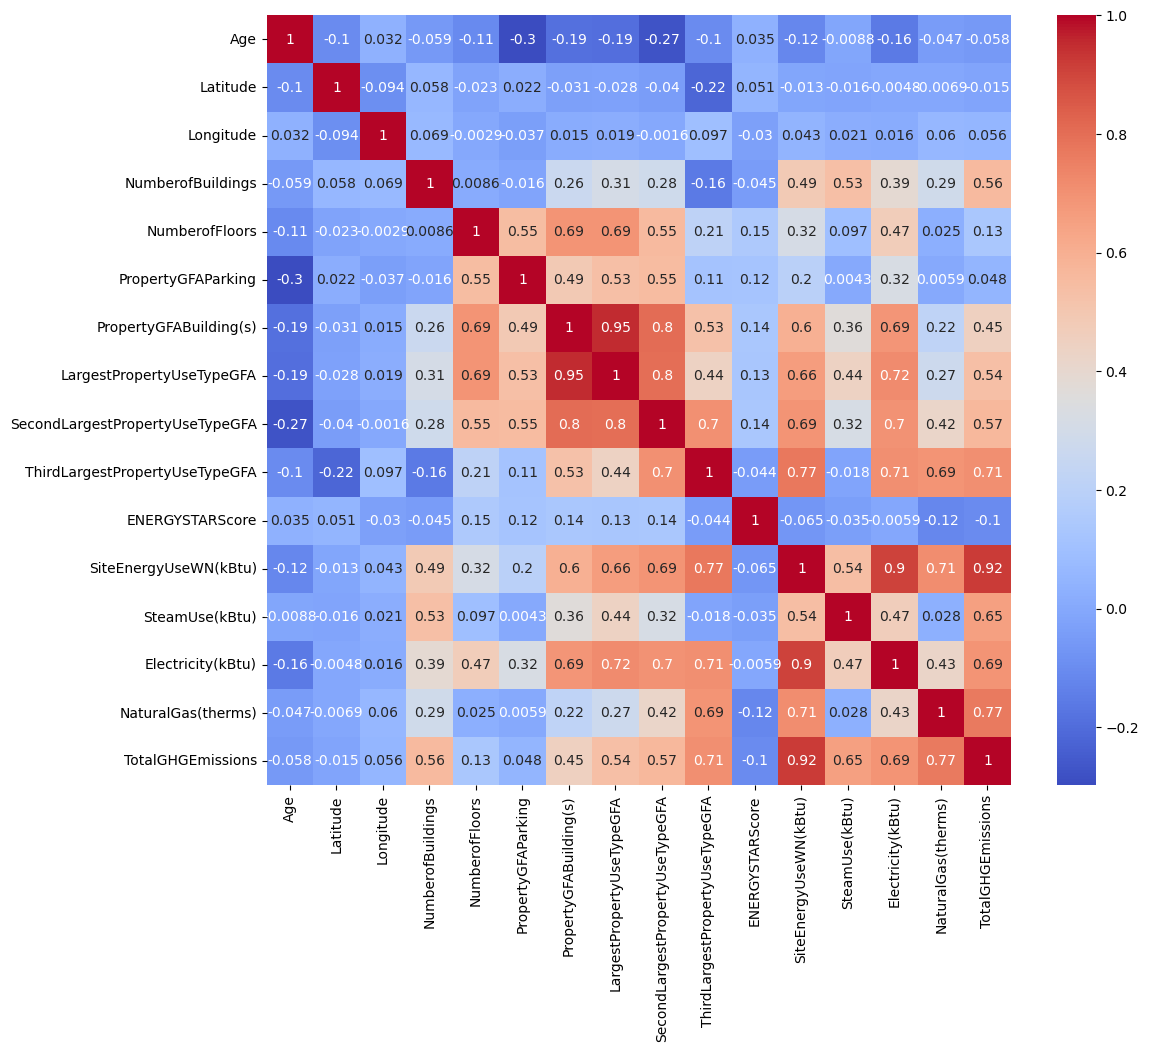

In [41]:
corr= numerical_features.corr()
plt.figure(figsize =(12,10))
sns.heatmap(corr, annot= True, cmap = 'coolwarm')

In [42]:
### faire ACP POUR CONFIRMER 

In [ ]:
 print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(columns=['PropertyGFATotal', 'PropertyGFABuilding(s)','DataYear','NaturalGas(therms)','ThirdLargestPropertyUseTypeGFA','Electricity(kBtu)'])
print("Nombre de colonnes après la suppression :", df.shape[1])

In [50]:
df['PropertyGFABuilding(s)']


0       88434 
1       88502 
2       759392
3       61320 
4       113580
         ...  
3339    24990 
3347    45000 
3366    13661 
3369    15398 
3371    12294 
Name: PropertyGFABuilding(s), Length: 1094, dtype: int64

## Exploratory analysis

### partition de la consommation d'énergie par type de bâtiment

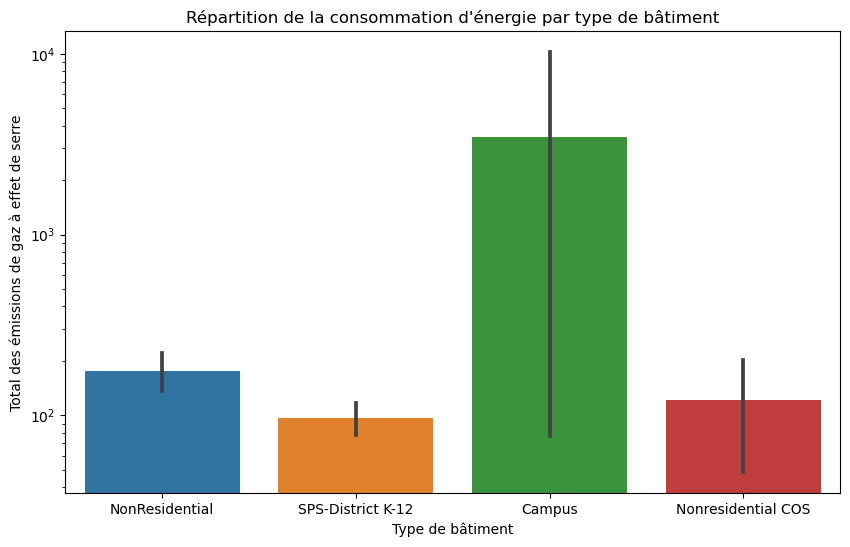

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='BuildingType', y='TotalGHGEmissions')
plt.title("Répartition de la consommation d'énergie par type de bâtiment")
plt.xlabel("Type de bâtiment")
plt.ylabel("Total des émissions de gaz à effet de serre")
plt.yscale("log")
plt.savefig("conso.png")  
plt.show()


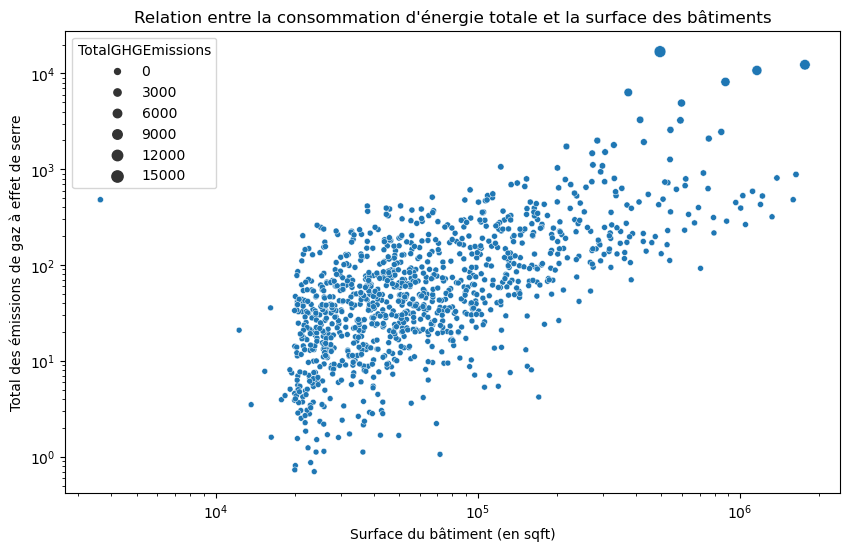

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PropertyGFABuilding(s)', y='TotalGHGEmissions', size='TotalGHGEmissions')
plt.title("Relation entre la consommation d'énergie totale et la surface des bâtiments")
plt.xlabel("Surface du bâtiment (en sqft)")
plt.ylabel("Total des émissions de gaz à effet de serre")
plt.yscale("log")
plt.xscale("log")
plt.savefig("consommation_surface.png")
plt.show()


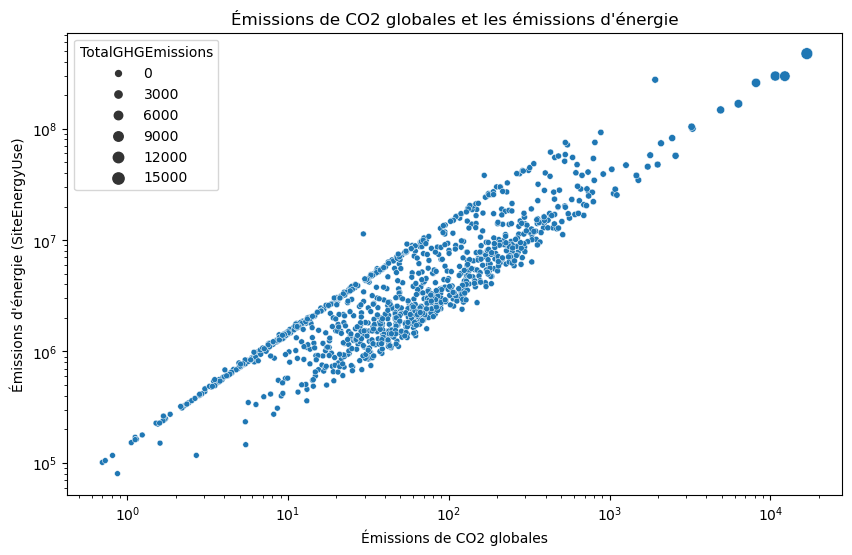

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalGHGEmissions', y='SiteEnergyUseWN(kBtu)', size='TotalGHGEmissions')
plt.title("Émissions de CO2 globales et les émissions d'énergie")
plt.xlabel("Émissions de CO2 globales")
plt.ylabel("Émissions d'énergie (SiteEnergyUse)")
plt.xscale("log")
plt.yscale("log")
plt.savefig("emissions_energie.png")
plt.show()


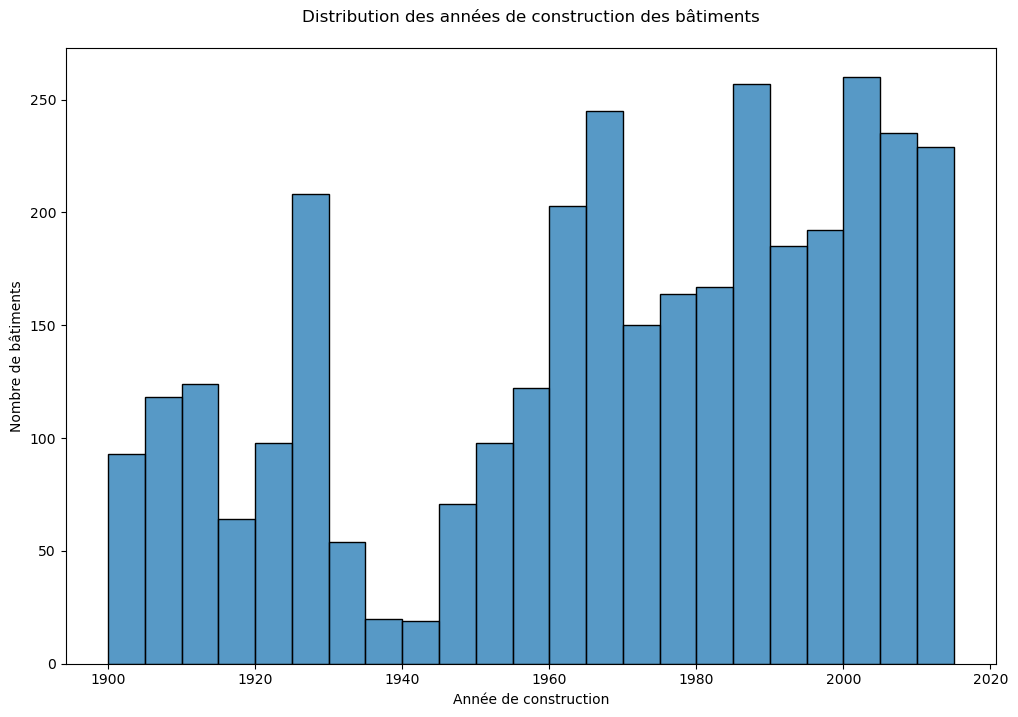

In [59]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='YearBuilt', bins=int((df.YearBuilt.max() - df.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n")
plt.savefig("anné de construction.png")



plt.show()

In [93]:
df[['DataYear', 'YearBuilt']]

DataYear  YearBuilt
0     2016      1927     
1     2016      1996     
2     2016      1969     
3     2016      1926     
4     2016      1980     
...    ...       ...     
3371  2016      1990     
3372  2016      2004     
3373  2016      1974     
3374  2016      1989     
3375  2016      1938     

[3376 rows x 2 columns]

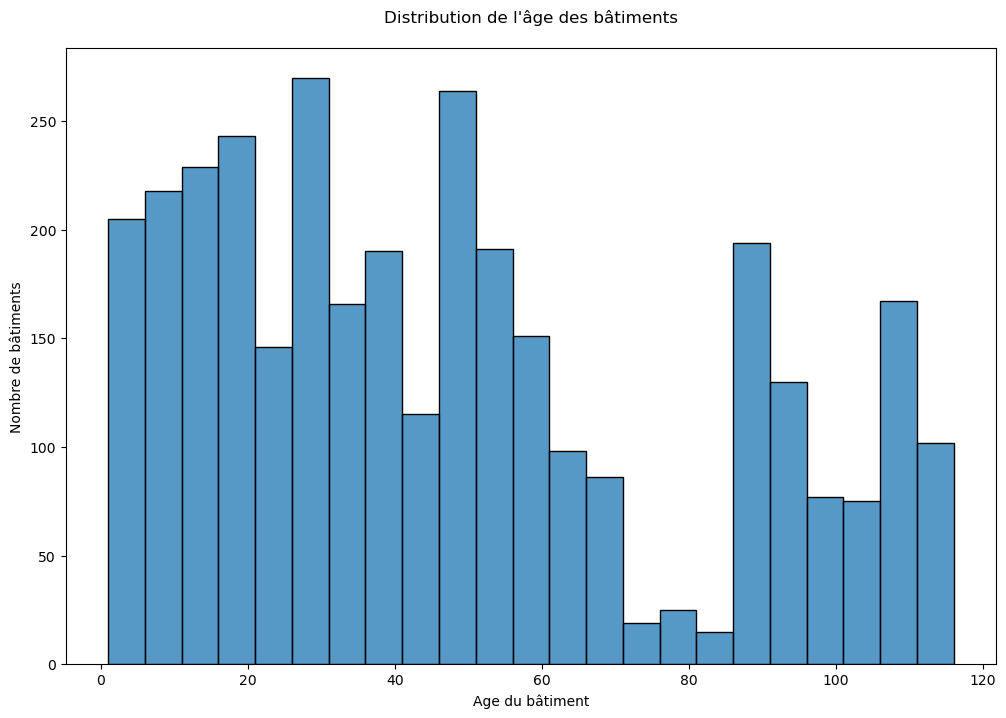

In [94]:
df['BuildingAge'] = 2016 - df['YearBuilt']
df.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='BuildingAge', bins=int((df.BuildingAge.max() - df.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n")
plt.savefig("age de construction.png")
plt.show()

C:\Users\HSPH9696\AppData\Local\Temp\ipykernel_3600\2343633039.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

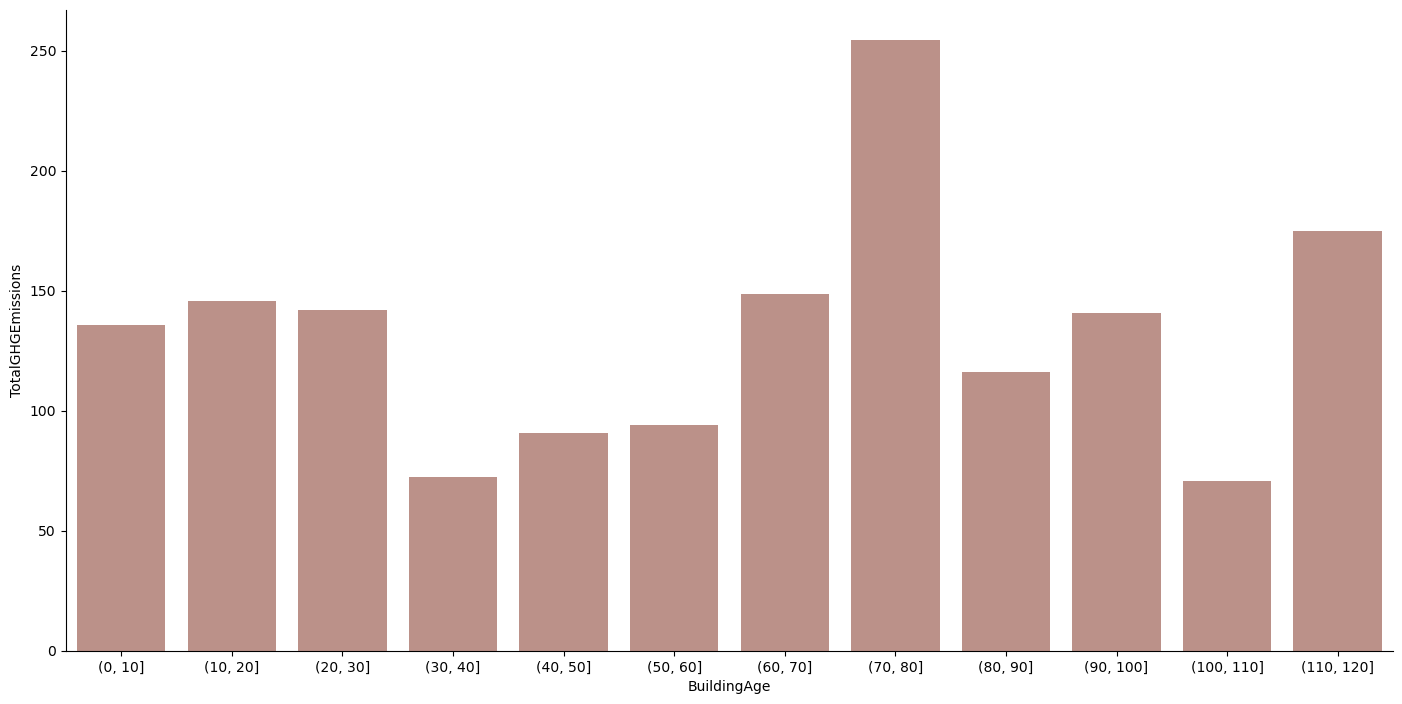

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supprimer les lignes avec des valeurs manquantes dans les colonnes 'BuildingAge' et 'totalemissio'
df_cleaned = df.dropna(subset=['BuildingAge', 'TotalGHGEmissions'])

bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), 
                                     (50, 60), (60, 70), (70,80), (80,90), (90,100), 
                                     (100,110), (110,120)])

sns.catplot(
    data=df_cleaned, kind="bar",
    x=pd.cut(df_cleaned['BuildingAge'], bins=bins), y="TotalGHGEmissions",
    ci=None, color="#9C3E2D", alpha=.6,
    height=7, aspect=2
)
plt.title("Influence de l'âge des bâtiments sur les émissions de CO2")
plt.savefig("influenceage.png")
plt.show()


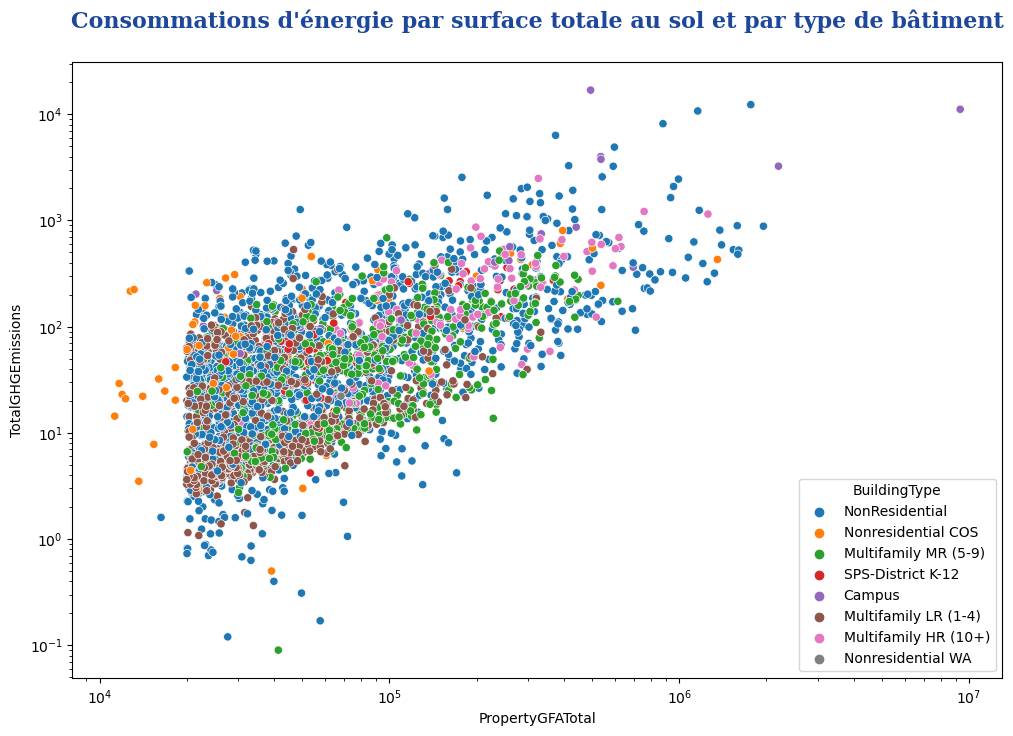

In [106]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='PropertyGFATotal', y='TotalGHGEmissions', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.xscale("log")
plt.yscale("log")
plt.savefig("cpnso.png")
plt.show()

In [ ]:
numerical_features = df.select_dtypes(include=['int64','float64'])
categorical_features = df.select_dtypes(exclude=['int64','float64'])

In [ ]:
numerical_features.columns

In [ ]:
categorical_features.columns

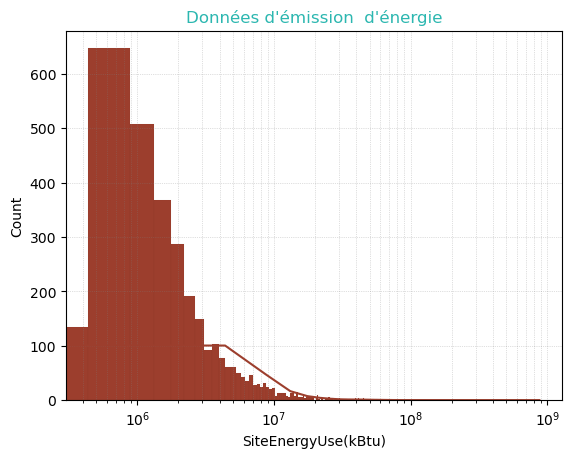

In [68]:
import seaborn as sns

# Tracer l'histogramme avec estimation de la densité
sns.histplot(data=df, x="SiteEnergyUse(kBtu)", kde=True, color="#9C3E2D", alpha=1)

# Ajouter un titre au graphique
plt.title("Données d'émission  d'énergie", color='#2cb7b0')
plt.grid(True, which='both', linestyle='dotted', linewidth=0.5, color='gray', alpha=0.5)
plt.xscale("log")
#plt.yscale('log')
# Afficher le graphique
plt.show()

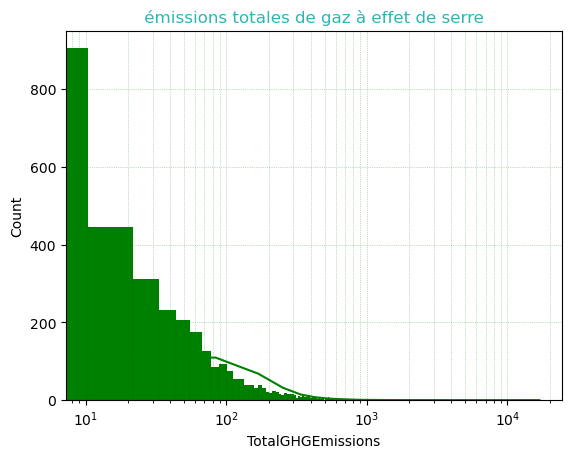

In [69]:
import seaborn as sns

# Tracer l'histogramme avec estimation de la densité
sns.histplot(data=df, x="TotalGHGEmissions", kde=True, color="green", alpha=1)

# Ajouter un titre au graphique
plt.title(" émissions totales de gaz à effet de serre ", color='#2cb7b0')
plt.grid(True, which='both', linestyle='dotted', linewidth=0.5, color='green', alpha=0.5)
plt.xscale("log")
#plt.yscale('log')
# Afficher le graphique
plt.show()

In [111]:
import pandas as pd

# Statistiques descriptives pour TotalGHGEmissions
total_ghg_stats = df['TotalGHGEmissions'].describe()

# Statistiques descriptives pour SiteEnergyUse(kBtu)
site_energy_stats = df['SiteEnergyUse(kBtu)'].describe()

# Affichage des statistiques descriptives
print("Statistiques descriptives pour TotalGHGEmissions :")
print(total_ghg_stats)
print("\nStatistiques descriptives pour SiteEnergyUse(kBtu) :")
print(site_energy_stats)


Statistiques descriptives pour TotalGHGEmissions :
count    3367.000000 
mean     119.723971  
std      538.832227  
min     -0.800000    
25%      9.495000    
50%      33.920000   
75%      93.940000   
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

Statistiques descriptives pour SiteEnergyUse(kBtu) :
count    3.371000e+03
mean     5.403667e+06
std      2.161063e+07
min      0.000000e+00
25%      9.251286e+05
50%      1.803753e+06
75%      4.222455e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64
